<a href="https://colab.research.google.com/github/nilesh2gupta/UBC_project/blob/main/Bert_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from transformers import TFRobertaModel, RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
RoBERTa_model = TFRobertaModel.from_pretrained('roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [2]:
def get_bert_input(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='tf')
    return inputs

def get_bert_last_hidden_state_output(inputs,model):
    output = model(inputs)
    return output.last_hidden_state.numpy()

def get_bert_pooler_output(inputs,model):
    output=model(inputs)
    return output.pooler_output.numpy()

def convert_to_bert_last_hidden_state_output(text,model):
    inputs =get_bert_input(text)
    output = get_bert_last_hidden_state_output(inputs,model)
    return output

def convert_to_bert_pooler_output(text,model):
    inputs =get_bert_input(text)
    output = get_bert_pooler_output(inputs,model)
    return  output

def model_prediction_input(text,max_squence_length,bert_model):
    inputs = tokenizer(text, padding=True, truncation=True,max_length=max_squence_length, return_tensors='tf')
    padded_input = tokenizer.pad(inputs, max_length=max_squence_length, padding='max_length', return_tensors='tf')
    output=bert_model(padded_input)
    return output.last_hidden_state.numpy()


In [15]:
import pandas as pd
import numpy as np
df_new=pd.read_csv('/content/drive/MyDrive/UBC_project/cleaned_data_no_special_characters.csv',encoding='UTF-8')

In [16]:
df_new = df_new[(df_new['claims'].str.split().str.len() > 3) & (df_new['claims'].str.split().str.len() < 20)]
df_new.shape

(3850, 2)

<Axes: xlabel='claims_labels'>

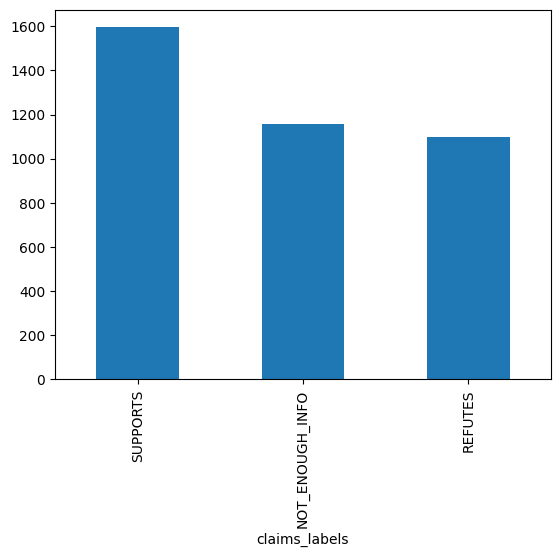

In [17]:
df_new['claims_labels'].value_counts().plot(kind='bar')

Balanced Class Distribution:
claims_labels
SUPPORTS           1099
NOT_ENOUGH_INFO    1099
REFUTES            1099
Name: count, dtype: int64


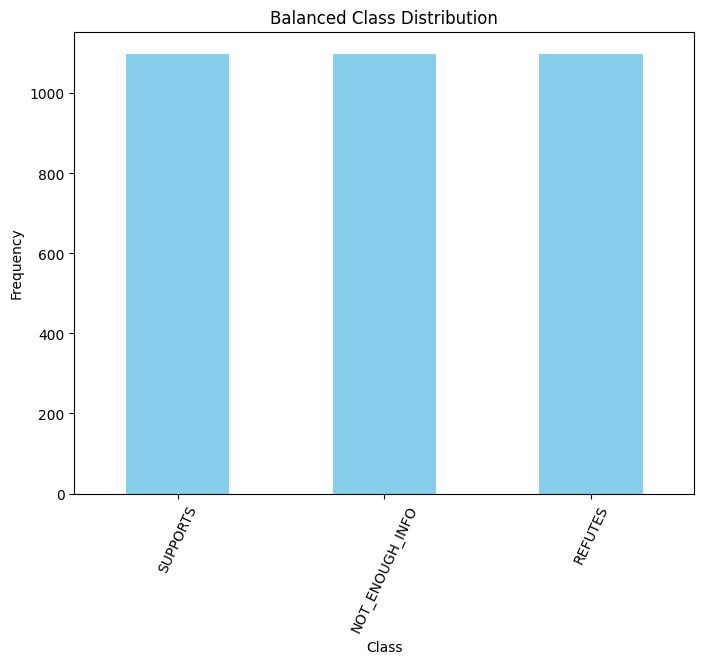

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
min_class_size = min(df_new['claims_labels'].value_counts())

balanced_train_data = pd.DataFrame(columns=['claims','claims_labels'])

class_distribution = df_new['claims_labels'].value_counts()

for genre, count in class_distribution.items():
  class_data = df_new[df_new['claims_labels'] == genre].sample(n=min_class_size, random_state=22)
  balanced_train_data = pd.concat([balanced_train_data, class_data], ignore_index=True)

balanced_train_data.describe()
balanced_class_distribution = balanced_train_data['claims_labels'].value_counts()

print("Balanced Class Distribution:")
print(balanced_class_distribution)

plt.figure(figsize=(8, 6))
balanced_class_distribution.plot(kind='bar', color='skyblue')
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()


In [19]:
df_new=balanced_train_data

In [20]:
def ohe(text):

    if text=='SUPPORTS':
         return 2
    elif text=='NOT_ENOUGH_INFO':
         return 1
    elif text=='REFUTES' :
          return 0
    return 0

df_new['claims_labels']=df_new['claims_labels'].apply(lambda x:ohe(x))

df_new=df_new.sample(n=800,random_state=22)
df_new.shape

(800, 2)

<Axes: xlabel='claims_labels'>

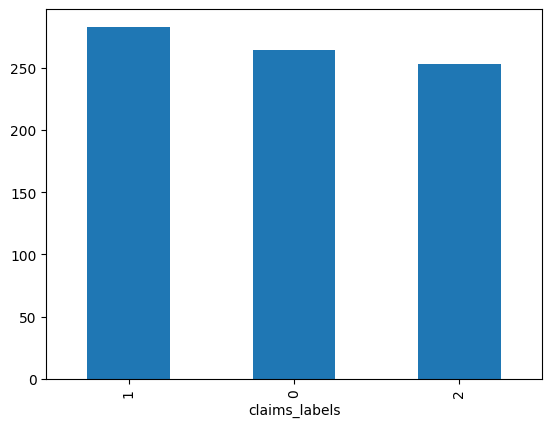

In [21]:
df_new['claims_labels'].value_counts().plot(kind='bar')

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_new['claims'],df_new['claims_labels'],test_size=0.001,random_state=2)

In [23]:
x_train = []

def create_list(text):
    x_train.append(text)

X_train.apply(lambda x: create_list(x))

print(x_train)

['so CO2 cause warm and rise temperature cause CO2 rise', 'as part of a collaboration project Professor Byron Adams Brigham Young University and colleague Diana All Colorado State University', 'face prospect of a court loss EPA chief Andrew Wheeler overturn one of Pruitts final action', 'for the past 4567 million year the sun and the earths orbit have drive climate change cycle', 'under the influence of global warming melt at the base of the ice sheet increase', 'the most important message from the landmarks report on global warming', 'climate forcing be change that cause temperature to rise or fall disrupt the energy balance', 'scientist can then run these scenario through physical climate model to generate climate change projection', 'Star war the last Red star Dark Family ring in the new year with a new Trumpster sweet', 'from grassroot to global these initiative aim to counter our most pressing environmental issue', 'N2O have a mean atmosphere lifetime of 121 year', 'suffocating oc

In [24]:
x_train = convert_to_bert_last_hidden_state_output(x_train,RoBERTa_model)
print(x_train.shape)
max_squence_length = x_train.shape[1]
embedding_dim = x_train.shape[2]

(799, 31, 768)


#Model Architecture

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 claims_input (InputLayer)   [(None, 31, 768)]            0         []                            
                                                                                                  
 Conv1D_layer (Conv1D)       (None, 27, 256)              983296    ['claims_input[0][0]']        
                                                                                                  
 MaxPooling_layer (MaxPooli  (None, 13, 256)              0         ['Conv1D_layer[0][0]']        
 ng1D)                                                                                            
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 13, 200)              285600    ['MaxPooling_layer[0][0]

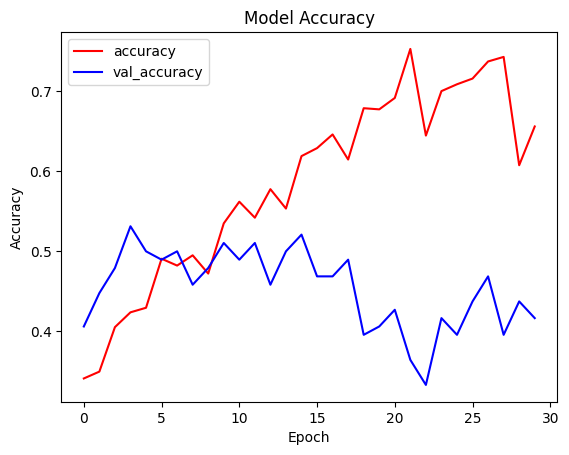

In [25]:
from keras.layers import Input,Flatten, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Attention
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

# BERT output is feeded as input
input_layer = Input(shape=(max_squence_length,embedding_dim,), name='claims_input')

# Convolutional layer
conv_layer = Conv1D(filters=256, kernel_size=5, activation='relu', name='Conv1D_layer')(input_layer)
pooling_layer = MaxPooling1D(pool_size=2, name='MaxPooling_layer')(conv_layer)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(100, return_sequences=True, name='BiLSTM_layer'))(pooling_layer)

# Attention mechanism
attention = Attention(name='Attention_layer')([bilstm_layer, bilstm_layer])
attention_pooling = GlobalMaxPooling1D(name='Attention_Pooling_layer')(attention)

# Dense layers
dense_layer = Dense(100, activation='relu', name='Dense_layer_1')(attention_pooling)
dropout_layer = Dropout(0.6, name='Dropout_layer_1')(dense_layer)
dense_layer_2 = Dense(50, activation='relu', name='Dense_layer_2')(dropout_layer)
dropout_layer_2 = Dropout(0.5, name='Dropout_layer_2')(dense_layer_2)

# Output layer for multi-class classification
output_layer = Dense(3, activation='softmax', name='output_layer')(dropout_layer_2)


#the model
model = Model(inputs=input_layer, outputs=output_layer)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=Nadam(learning_rate=0.001), loss=loss, metrics=['accuracy'])

#model summary
model.summary()

#checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/UBC_project/RoBERTa_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


#training parameters
batch_size = 100
epochs = 30

history = model.fit(
    x_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.12,
    #callbacks=[checkpoint_callback]
)

#graph
plt.plot(history.history['accuracy'], color='red',label='accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


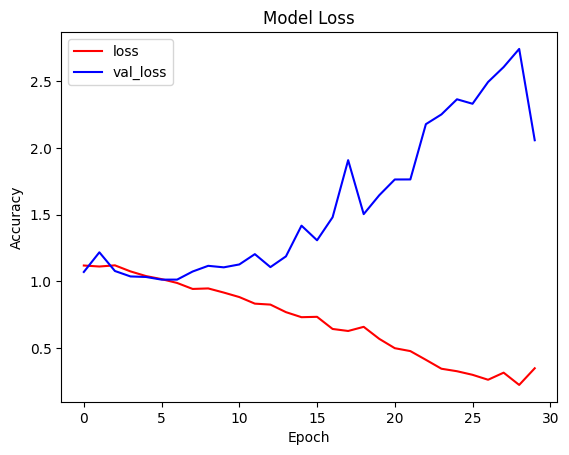

In [ ]:
#graph
plt.plot(history.history['loss'], color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.argmax(y_true, axis=-1)

    class_ids = K.arange(0, K.max(y_true) + 1, dtype='int32')
    true_positives = K.sum(K.cast(K.equal(y_true, y_pred), 'float32'), axis=0)
    false_positives = K.sum(K.cast(K.not_equal(y_true, y_pred) & K.equal(y_pred, class_ids[:, None]), 'float32'), axis=1)
    false_negatives = K.sum(K.cast(K.not_equal(y_true, y_pred) & K.equal(y_true, class_ids[:, None]), 'float32'), axis=1)

    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

    f1_score_mean = K.mean(f1)
    return f1_score_mean

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 claims_input (InputLayer)   [(None, 31, 768)]            0         []                            
                                                                                                  
 Conv1D_layer (Conv1D)       (None, 27, 256)              983296    ['claims_input[0][0]']        
                                                                                                  
 MaxPooling_layer (MaxPooli  (None, 13, 256)              0         ['Conv1D_layer[0][0]']        
 ng1D)                                                                                            
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 13, 200)              285600    ['MaxPooling_layer[0][0]

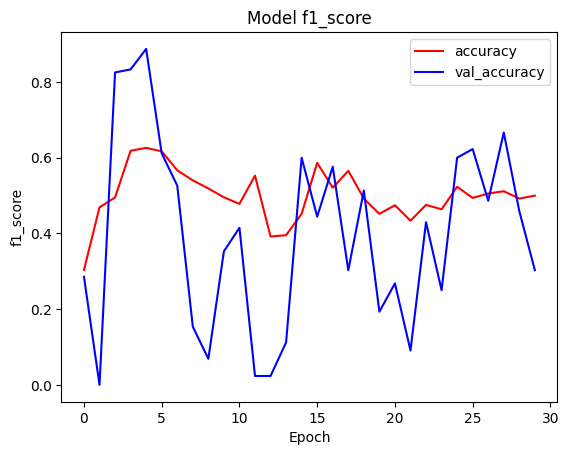

In [ ]:
from keras.layers import Input,Flatten, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Attention
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf



# BERT output is feeded as input
input_layer = Input(shape=(max_squence_length,embedding_dim,), name='claims_input')

# Convolutional layer
conv_layer = Conv1D(filters=256, kernel_size=5, activation='relu', name='Conv1D_layer')(input_layer)
pooling_layer = MaxPooling1D(pool_size=2, name='MaxPooling_layer')(conv_layer)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(100, return_sequences=True, name='BiLSTM_layer'))(pooling_layer)

# Attention mechanism
attention = Attention(name='Attention_layer')([bilstm_layer, bilstm_layer])
attention_pooling = GlobalMaxPooling1D(name='Attention_Pooling_layer')(attention)

# Dense layers
dense_layer = Dense(100, activation='relu', name='Dense_layer_1')(attention_pooling)
dropout_layer = Dropout(0.6, name='Dropout_layer_1')(dense_layer)
dense_layer_2 = Dense(50, activation='relu', name='Dense_layer_2')(dropout_layer)
dropout_layer_2 = Dropout(0.5, name='Dropout_layer_2')(dense_layer_2)

# Output layer for multi-class classification
output_layer = Dense(3, activation='softmax', name='output_layer')(dropout_layer_2)


#the model
model = Model(inputs=input_layer, outputs=output_layer)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=Nadam(learning_rate=0.001), loss=loss, metrics=[f1_score])

#model summary
model.summary()

#checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/UBC_project/f1_score_RoBERTa_model.h5', monitor='val_f1_score', save_best_only=True, mode='max', verbose=1)


#training parameters
batch_size = 100
epochs = 30

history = model.fit(
    x_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.12,
    #callbacks=[checkpoint_callback]
)

#graph
plt.plot(history.history['f1_score'], color='red',label='accuracy')
plt.plot(history.history['val_f1_score'],color='blue',label='val_accuracy')
plt.title('Model f1_score')
plt.ylabel('f1_score')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
import re
import numpy as np

def remove_link(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    if pattern:
        return pattern.sub(r'', text)
    else:
        return text

import string
Exclude=string.punctuation



def remove_punctuation(text):
    return text.translate(str.maketrans('','',Exclude))

def remove_html_tag(text):
    i=0
    pattern=re.compile(r'<.*?>')
    if pattern:
      list=np.array(pattern.findall(text))
      n=list.shape[0]
    for i in range(n):
      text= text.replace(list[i],'')
    return text


from textblob import TextBlob

def correct_spell(text):
    textblb=TextBlob(text)
    return textblb.correct().string


import nltk

from nltk.corpus import stopwords

nltk.download('stopwords')


extra=stopwords.words('english')
stopwrd=np.array(extra)

def remove_stopwords(text, stopwords):
    split_text = text.split()
    filtered_text = []

    for word in split_text:
        if word not in stopwords:
            filtered_text.append(word)

    result = ' '.join(filtered_text)
    return result

def remove_emoji(text):
    pattern=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    if pattern:
       list= pattern.findall(text)
    return pattern.sub(r'', text)

import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatization(text):
    doc=nlp(text)
    text_=[]
    for word in doc:
       text_.append(word.lemma_)

    result = ' '.join(text_)
    return result

def text_cleaning(text,stopwords):
    text=text.lower()
    text=remove_link(text)
    text=remove_html_tag(text)
    text=remove_emoji(text)
    text=remove_stopwords(text,stopwords)
    text=remove_punctuation(text)
    text=lemmatization(text)
    text=correct_spell(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
text_cleaning('Climate change is a natural process and not influenced by human activities',stopwrd)

'climate change natural process influence human activity'

In [ ]:
from keras.utils import custom_object_scope
class InferenceModel:
    def __init__(self, model_path='/content/drive/MyDrive/UBC_project/RoBERTa_model.h5'):
        self.model_path = model_path
        self.model = self.load_model()

    def load_model(self):
        return tf.keras.models.load_model(self.model_path)


    def predict(self, input_data):
        input_data = text_cleaning(input_data,stopwrd)
        list=[]
        list.append(input_data)
        max_squence_length =46
        input_data=model_prediction_input(list,max_squence_length,RoBERTa_model)
        predictions = self.model.predict(input_data)
        return predictions



In [ ]:
inference_model = InferenceModel()
def generate_output(text):
    output = inference_model.predict(text)
    return output


1/1 [==============================] - 1s 1s/step


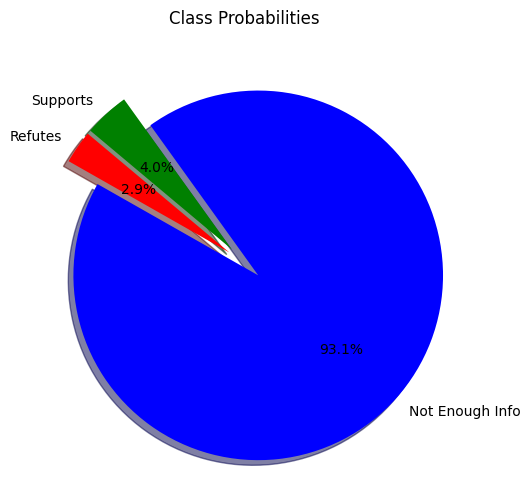

In [ ]:
# Generate probabilities for the given text
probabilities = generate_output('Climate change is a natural process and not influenced by human activities')

# Extract probabilities for each class
class_0_prob = probabilities[0, 0]
class_1_prob = probabilities[0, 1]
class_2_prob = probabilities[0, 2]

# Define the class labels
classes = ['Refutes', 'Not Enough Info', 'Supports']

# Define the probabilities
values = [class_0_prob, class_1_prob, class_2_prob]

# Define colors for the pie chart
colors = ['red','blue','green']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=classes, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0.1, 0.1))

# Adding a title
plt.title('Class Probabilities')

# Display the pie chart
plt.show()


In [ ]:
!pip install pyngrok
!pip install flask-ngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token('2jLw4uo6rdnvKmujYT1Hi5aRcZD_4RPxMKhdbLbZAe8Q83xDA')
public_url = ngrok.connect(5000).public_url
print(public_url)


from flask import Flask, render_template, request, jsonify, render_template_string
from flask_ngrok import run_with_ngrok
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def index():
    return render_template_string('''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Climate Change Misinformation Checker</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background: url('https://cdn.prod.website-files.com/656a6f5ca4824808211181c5/65a7ef109c30ede6f2c52e51_240111-Climate-change-Blog-2.jpg') no-repeat center center fixed;
                background-size: cover;
                margin: 0;
                display: flex;
                flex-direction: column;
                align-items: center;
                justify-content: center;
                min-height: 100vh;
                color: white;
            }

            .container {
                background-color: rgba(0, 0, 25, 0.7);
                padding: 20px;
                border-radius: 10px;
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
                width: 90%;
                max-width: 800px;
                text-align: center;
                color: #333;
            }

            h1 {
                color: #fff;
            }

            p {
                color: #fff;
            }

            textarea {
                width: 100%;
                height: 40px;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                margin-bottom: 20px;
                font-size: 16px;
            }

            button {
                background-color: #007BFF;
                color: white;
                padding: 10px 20px;
                border: none;
                border-radius: 5px;
                cursor: pointer;
                font-size: 16px;
            }

            button:hover {
                background-color: #49FF33;
            }

            #result {
                margin-top: 20px;
                font-size: 18px;
            }

            .media {
                display: flex;
                flex-direction: column;
                align-items: center;
                margin-top: 20px;
            }

            .media img {
                max-width: 100%;
                border-radius: 10px;
                margin-bottom: 20px;
            }

            .media video {
                max-width: 100%;
                border-radius: 10px;
                margin-bottom: 20px;
            }
            .chart-container {
                width: 50%;
                height: 200px;
                margin-top: 20px;
                align-items: center;
                text-align: center;
                display: flex;
                justify-content: center;
                border-radius: 10px;
                box-shadow: 1 0 10px rgba(0, 0, 0, 0.5);
            }
        </style>
        <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    </head>
    <body>
        <div class="container">
            <h1>Climate Change Misinformation Checker</h1>
            <p>Enter the news content below to check if it contains misinformation.</p>
            <form id="newsForm">
                <textarea id="newsInput" name="newsInput" placeholder="Enter news content here..."></textarea>
                <button type="submit">Check Misinformation</button>
            </form>

            <div class="media">
                <h2 style="color : white ">RESULT</h2>
                <p id="resultText"></p>
                <div class="chart-container">
                <canvas id="pieChart" width="20" height="20"></canvas>
                </div>
                <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFxxei1iazWGrGNEJ-IttgK7krnibcK5irYA&s" alt="Climate Change">
                <iframe src="https://www.youtube.com/embed/EuwMB1Dal-4" allowfullscreen></iframe>
            </div>
        </div>
        <script>
    document.getElementById('newsForm').addEventListener('submit', function(event) {
        event.preventDefault();
        const newsInput = document.getElementById('newsInput').value;

        fetch('/result', {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json',
            },
            body: JSON.stringify({ newsInput: newsInput }),
        })
        .then(response => response.json())
        .then(data => {
            const resultText = document.getElementById('resultText');
            const ctx = document.getElementById('pieChart').getContext('2d');

            if (data.error) {
                resultText.textContent = data.error;
            } else {
                resultText.textContent = data.result;

                // Destroy previous chart instance if it exists
                if (window.myPieChart) {
                    window.myPieChart.destroy();
                }

                // Create new chart instance
                window.myPieChart = new Chart(ctx, {
                    type: 'pie',
                    data: {
                        labels: ['Refutes', 'Not Enough Info', 'Supports'],
                        datasets: [{
                            label: 'Probability',
                            data: data.probabilities,
                            backgroundColor: ['red', 'blue', 'green'],
                            borderWidth: 1
                        }]
                    },
                    options: {
                        responsive: true,
                        cutout: 20,
                        plugins: {
                            legend: {
                                position: 'top',
                            },
                            tooltip: {
                                callbacks: {
                                    label: function(tooltipItem) {
                                        return tooltipItem.label + ': ' + tooltipItem.raw.toFixed(2) + '%';
                                    }
                                }
                            }
                        },
                        layout: {
                            padding: {
                                top: 10,
                                right: 10,
                                bottom: 10,
                                left: 10
                            }
                        },
                        animation: {
                            animateScale: true,
                            animateRotate: true
                        }
                    }
                });
            }
        })
        .catch((error) => {
            console.error('Error:', error);
        });
    });
</script>

    </body>
    </html>
    ''')

@app.route('/result', methods=['POST'])
def result():
    try:
        data = request.get_json()
        news_content = data['newsInput']
        probabilities = inference_model.predict(news_content)
        class_0_prob = float(probabilities[0, 0])
        class_1_prob = float(probabilities[0, 1])
        class_2_prob = float(probabilities[0, 2])

        result_text = f"Refutes: {class_0_prob*100:.2f}%,  Not Enough Info: {class_1_prob*100:.2f}%,  Supports: {class_2_prob*100:.2f}%"
        return jsonify(result=result_text, probabilities=[class_0_prob*100, class_1_prob*100, class_2_prob*100])

    except Exception as e:
        return jsonify(error=str(e))

if __name__ == '__main__':
    app.run()


https://6944-34-125-47-133.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://6944-34-125-47-133.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [17/Jul/2024 20:03:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Jul/2024 20:03:44] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 1s 1s/step


INFO:werkzeug:127.0.0.1 - - [17/Jul/2024 20:03:55] "POST /result HTTP/1.1" 200 -


#Roberta with adapter layer

In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaModel, RobertaTokenizer
import numpy as np

class AdapterLayer(nn.Module):
    def __init__(self, input_dim, adapter_dim):
        super(AdapterLayer, self).__init__()
        self.linear1 = nn.Linear(input_dim, adapter_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(adapter_dim, input_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

class RobertaWithAdapter(nn.Module):
    def __init__(self, model_name, adapter_dim):
        super(RobertaWithAdapter, self).__init__()
        self.roberta = RobertaModel.from_pretrained(model_name)
        self.adapter = AdapterLayer(self.roberta.config.hidden_size, adapter_dim)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state

        # Pass through adapter layer
        adapter_output = self.adapter(sequence_output)

        return adapter_output

# Initialize tokenizer and model
model_name = "roberta-base"
adapter_dim = 64  # Size of the adapter layer
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaWithAdapter(model_name, adapter_dim)

# Example input text
text = "How are you"
inputs = tokenizer(text, return_tensors="pt")

# Forward pass through the model
adapter_output = model(**inputs)
adapter_output = adapter_output.detach().numpy()

print("Adapter Output:", adapter_output.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adapter Output: (1, 5, 768)


In [ ]:
import torch
import torch.nn.functional as F

class AttentiveGraphPoolingLayer(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(AttentiveGraphPoolingLayer, self).__init__()
        self.WQ = torch.nn.Linear(hidden_dim, hidden_dim)
        self.WK = torch.nn.Linear(hidden_dim, hidden_dim)
        self.WV = torch.nn.Linear(hidden_dim, hidden_dim)
        self.hidden_dim = hidden_dim

    def forward(self, h, c):
        # h: Hidden state of the news article, shape (batch_size, hidden_dim)
        # c: Hidden states of entities, shape (batch_size, num_entities, hidden_dim)

        # Compute Q, K, V
        Q = self.WQ(h).unsqueeze(1)  # Shape: (batch_size, 1, hidden_dim)
        K = self.WK(c)               # Shape: (batch_size, num_entities, hidden_dim)
        V = self.WV(c)               # Shape: (batch_size, num_entities, hidden_dim)

        # Calculate attention scores
        attn_scores = torch.matmul(Q, K.transpose(1, 2))  # Shape: (batch_size, 1, num_entities)
        attn_scores = attn_scores / torch.sqrt(torch.tensor(self.hidden_dim, dtype=torch.float32))

        # Apply softmax to get attention weights
        attn_weights = F.softmax(attn_scores, dim=-1)  # Shape: (batch_size, 1, num_entities)

        # Weighted sum of values
        attended_values = torch.matmul(attn_weights, V)  # Shape: (batch_size, 1, hidden_dim)

        # Squeeze to remove the middle dimension
        attended_values = attended_values.squeeze(1)  # Shape: (batch_size, hidden_dim)

        return attended_values, attn_weights.squeeze(1)


In [ ]:
# Example usage
batch_size = 4
num_entities = 10
hidden_dim = 64

# Create example input tensors
h = torch.randn(batch_size, hidden_dim)  # Hidden state of the news article
c = torch.randn(batch_size, num_entities, hidden_dim)  # Hidden states of entities

# Instantiate the pooling layer
pooling_layer = AttentiveGraphPoolingLayer(hidden_dim)

# Forward pass
attended_values, attn_weights = pooling_layer(h, c)

print("Attended Values shape:", attended_values.shape)
print("Attention Weights shape:", attn_weights.shape)


Attended Values shape: torch.Size([4, 64])
Attention Weights shape: torch.Size([4, 10])
